# Nanodegree Engenheiro de Machine Learning

## Projeto Final
### Diarização de tradução alternada com retreinamento incremental
#### Márcio Mazza
## Treinamento e classificação

Este notebook demonstra o processo de treinamento e classificação.

Para que todas as células executem com sucesso é necessário configurar os arquivos de dados conforme indicado no README do projeto.

In [1]:
from speechsplit import get_features
import matplotlib.pyplot as plt
import numpy as np
from utils import play, load_audio
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import xticks, yticks

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('seaborn-colorblind')

fnames = ['data/2014_01_20_F.wav',
          'data/2014_01_21_F.wav',
          'data/2014_01_22_F.wav',
          'data/2014_01_23_F.wav',]
audios = [load_audio(f) for f in fnames]

Inicialmente vamos executar o treinamento e classificação simples de um trecho com os 10 minuto iniciais do primeiro discurso.

In [2]:
from speechsplit import start_classification, refit_from_best, report_on_evolution_of_refit_from_best

audio_10min = load_audio('data/2014_01_20_F_10min.wav')
%time clf_10min = start_classification(audio_10min)
%time evolution_10min = refit_from_best(clf_10min, audio_10min)

Refit and re-predict DONE (in 00:00.953)
CPU times: user 4.6 s, sys: 1.6 s, total: 6.19 s
Wall time: 5.39 s
Refit and re-predict DONE (in 00:00.937)
Retrained on 6.28% of fragments. Error: 4.28%
Refit and re-predict DONE (in 00:01.588)
Retrained on 11.59% of fragments. Error: 2.24%
Refit and re-predict DONE (in 00:02.222)
Retrained on 16.43% of fragments. Error: 1.58%
Refit and re-predict DONE (in 00:02.883)
Retrained on 21.26% of fragments. Error: 1.73%
Refit and re-predict DONE (in 00:03.687)
Retrained on 25.60% of fragments. Error: 1.28%
Refit and re-predict DONE (in 00:04.760)
Retrained on 29.47% of fragments. Error: 2.09%
Refit and re-predict DONE (in 00:05.447)
Retrained on 33.33% of fragments. Error: 1.28%
Refit and re-predict DONE (in 00:06.478)
Retrained on 37.20% of fragments. Error: 2.09%
Refit and re-predict DONE (in 00:07.104)
Retrained on 40.58% of fragments. Error: 1.28%
Refit and re-predict DONE (in 00:08.603)
Retrained on 43.96% of fragments. Error: 1.28%
Refit and re-

O resultado de algoritmo é uma lista de tuplas com três conjuntos:
* a base usada para treinamento da iteração (*training*)
* o restante dos fragmentos (*remaining*)
* a lista completa de fragmentos (*all*)

Vejamos quais foram os erros proporcionais ao **número de fragmentos** *(N)* e **tempo total** *(Time)*, para cada um desses grupos.

In [5]:
report_on_evolution_of_refit_from_best(evolution_10min)

,trainning (N),trainning (Time),remaining (N),remaining (Time),all (N),all (Time)
0,0.0,0.0,0.056701,0.045312,0.053140,0.042829
1,0.0,0.0,0.032787,0.024975,0.028986,0.022366
2,0.0,0.0,0.023121,0.019167,0.019324,0.015848
3,0.0,0.0,0.024540,0.022390,0.019324,0.017304
4,0.0,0.0,0.019481,0.017737,0.014493,0.012788
5,0.0,0.0,0.027397,0.031026,0.019324,0.020877
6,0.0,0.0,0.021739,0.020764,0.014493,0.012788
7,0.0,0.0,0.030769,0.036446,0.019324,0.020877
8,0.0,0.0,0.024390,0.023396,0.014493,0.012788
9,0.0,0.0,0.025862,0.025373,0.014493,0.012788


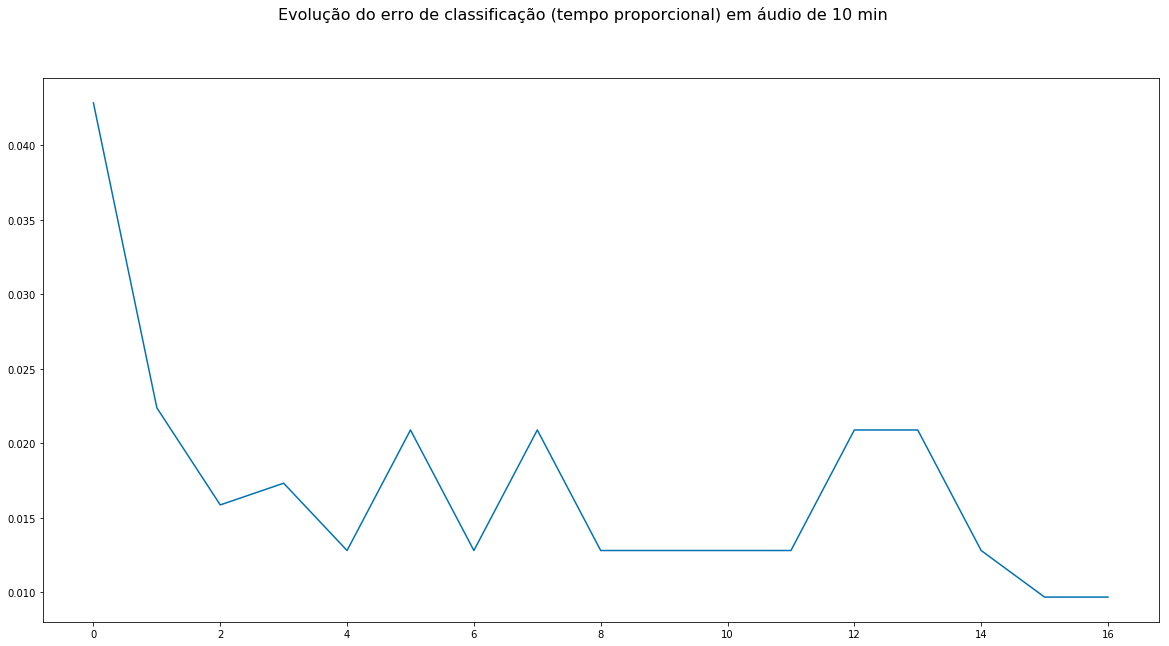

In [6]:
from speechsplit import error_in_chunks

print
fig = plt.figure()
fig.suptitle(u'Evolução do erro de classificação (tempo proporcional) em áudio de 10 min', fontsize=16)
plt.plot([error_in_chunks(chunks)[-1] for _, __, chunks in evolution_10min]);

Realizamos o mesmo processo com um discurso completo, limitando o número de iterações.

In [9]:
first_audio = audios[0]
%time clf_first = start_classification(first_audio)
%time evolution_first = refit_from_best(clf_first, first_audio, limit=10)

Refit and re-predict DONE (in 00:05.478)
CPU times: user 26.7 s, sys: 9.85 s, total: 36.5 s
Wall time: 33.3 s
Refit and re-predict DONE (in 00:05.484)
Retrained on 0.98% of fragments. Error: 9.26%
Refit and re-predict DONE (in 00:21.940)
Retrained on 6.04% of fragments. Error: 3.52%
Refit and re-predict DONE (in 00:36.291)
Retrained on 10.80% of fragments. Error: 3.41%
Refit and re-predict DONE (in 01:02.284)
Retrained on 15.33% of fragments. Error: 3.07%
Refit and re-predict DONE (in 01:27.011)
Retrained on 19.64% of fragments. Error: 2.94%
Refit and re-predict DONE (in 02:06.885)
Retrained on 23.72% of fragments. Error: 2.67%
Refit and re-predict DONE (in 02:42.228)
Retrained on 27.57% of fragments. Error: 2.70%
Refit and re-predict DONE (in 03:22.594)
Retrained on 31.27% of fragments. Error: 2.35%
Refit and re-predict DONE (in 04:19.789)
Retrained on 34.74% of fragments. Error: 2.21%
Refit and re-predict DONE (in 05:07.382)
Retrained on 38.07% of fragments. Error: 1.97%
CPU times: u

In [10]:
report_on_evolution_of_refit_from_best(evolution_first)

,trainning (N),trainning (Time),remaining (N),remaining (Time),all (N),all (Time)
0,0.0,0.0,0.090008,0.093409,0.089124,0.092595
1,0.0,0.0,0.036174,0.037677,0.033988,0.035203
2,0.0,0.0,0.035563,0.038462,0.031722,0.034119
3,0.0,0.0,0.035682,0.036958,0.030211,0.030734
4,0.0,0.0,0.036654,0.037516,0.029456,0.029376
5,0.0,0.0,0.036634,0.036801,0.027946,0.026697
6,0.0,0.0,0.035454,0.039692,0.025680,0.026973
7,0.0,0.0,0.032967,0.037202,0.022659,0.023488
8,0.0,0.0,0.031250,0.037056,0.020393,0.022051
9,0.0,0.0,0.029268,0.035933,0.018127,0.019664


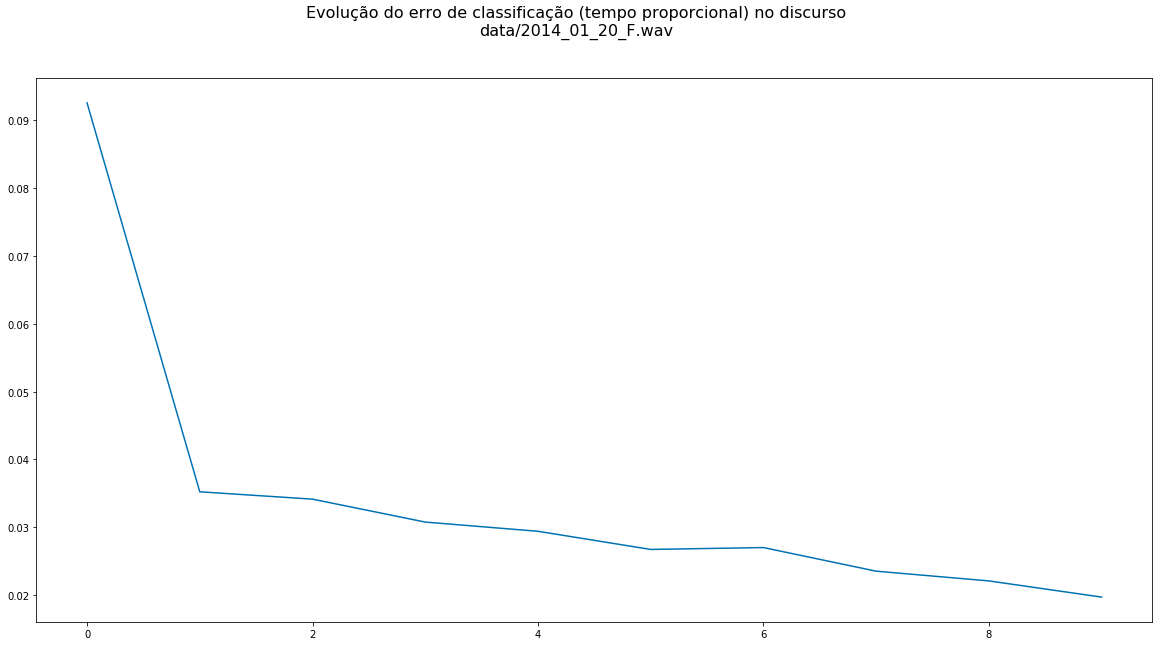

In [24]:
def plot_errors(evolution, audio):
    print
    fig = plt.figure()
    fig.suptitle(u'Evolução do erro de classificação (tempo proporcional) no discurso\n{}'.format(
        audio.filename), fontsize=16)
    plt.plot([error_in_chunks(chunks)[-1] for _, __, chunks in evolution]);

plot_errors(evolution_first, first_audio)

O processo também pode ser executado à exaustão, e tende a produzir erros menores, porém sem grande ganho e com tempo desproporcionalmente maior.
Na prática é mais conveniente simplesmente estabelecer o limite e, ao final do processo, inspecionar os fragmentos com pior classificação.

O mesmo processo pode ser executado com os 3 discursos restantes que tiveram *groud truth* atribuída.

In [25]:
evolution_list = []
for audio in audios[1:]:
    print('#'*80)
    print(u'INICIANDO O PROCESSAMENTO DO ÁUDIO {}\n'.format(audio.filename))
    %time clf = start_classification(audio)
    %time evolution = refit_from_best(clf, audio, limit=10)
    evolution_list.append(evolution)

################################################################################
INICIANDO O PROCESSAMENTO DO ÁUDIO data/2014_01_21_F.wav

Refit and re-predict DONE (in 00:03.029)
CPU times: user 3.02 s, sys: 16 ms, total: 3.03 s
Wall time: 3.03 s
Refit and re-predict DONE (in 00:03.220)
Retrained on 1.85% of fragments. Error: 3.69%
Refit and re-predict DONE (in 00:06.893)
Retrained on 6.89% of fragments. Error: 2.78%
Refit and re-predict DONE (in 00:10.162)
Retrained on 11.69% of fragments. Error: 2.86%
Refit and re-predict DONE (in 00:13.974)
Retrained on 16.24% of fragments. Error: 2.49%
Refit and re-predict DONE (in 00:18.936)
Retrained on 20.54% of fragments. Error: 2.49%
Refit and re-predict DONE (in 00:27.471)
Retrained on 24.60% of fragments. Error: 2.43%
Refit and re-predict DONE (in 00:36.344)
Retrained on 28.54% of fragments. Error: 2.28%
Refit and re-predict DONE (in 00:46.977)
Retrained on 32.23% of fragments. Error: 1.99%
Refit and re-predict DONE (in 00:55.547)
Retrained



Erros para o áudio data/2014_01_20_F.wav


,trainning (N),trainning (Time),remaining (N),remaining (Time),all (N),all (Time)
0,0.0,0.0,0.042607,0.037619,0.04182,0.036942
1,0.0,0.0,0.031704,0.030084,0.02952,0.027848
2,0.0,0.0,0.032033,0.032820,0.02829,0.028626
3,0.0,0.0,0.027900,0.030268,0.02337,0.024923
4,0.0,0.0,0.029412,0.032468,0.02337,0.024923
5,0.0,0.0,0.030995,0.034042,0.02337,0.024320
6,0.0,0.0,0.029260,0.034173,0.02091,0.022821
7,0.0,0.0,0.029038,0.031842,0.01968,0.019863
8,0.0,0.0,0.028681,0.031424,0.01845,0.018310
9,0.0,0.0,0.028283,0.029677,0.01722,0.015946


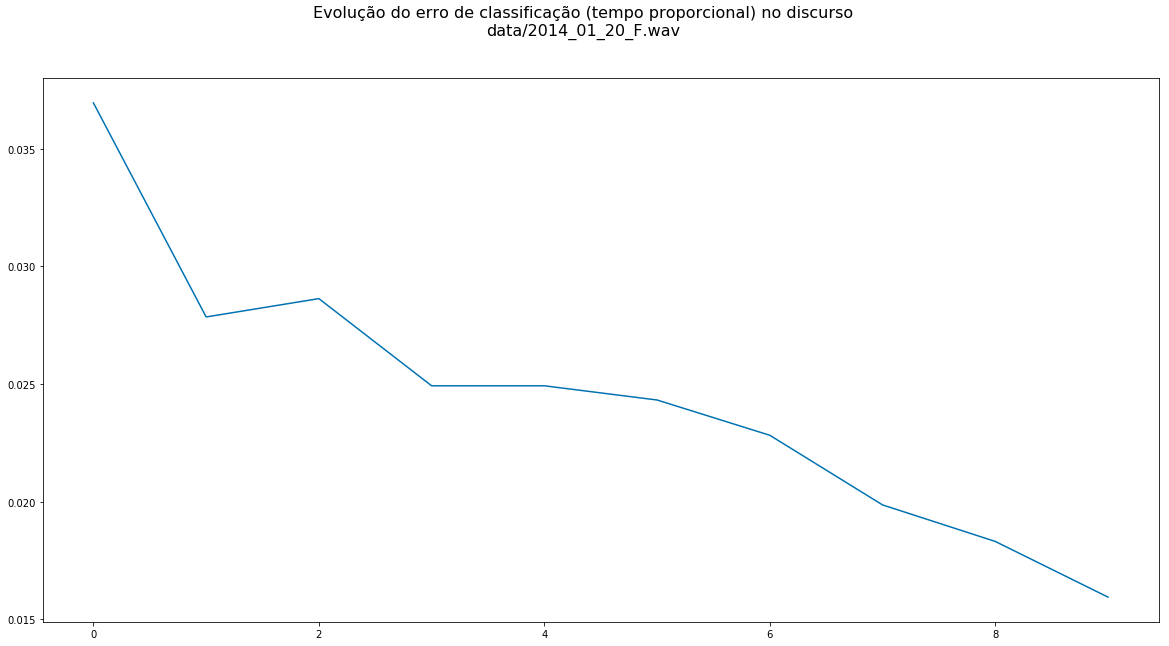

In [26]:
def show_report(index):
    plot_errors(evolution_list[index], audios[index])
    print('\nErros para o áudio {}'.format(audios[index].filename))
    return report_on_evolution_of_refit_from_best(evolution_list[index])

show_report(0)



Erros para o áudio data/2014_01_21_F.wav


,trainning (N),trainning (Time),remaining (N),remaining (Time),all (N),all (Time)
0,0.0,0.0,0.014480,0.015252,0.014286,0.015052
1,0.0,0.0,0.013465,0.015893,0.012605,0.014811
2,0.0,0.0,0.012299,0.015136,0.010924,0.013194
3,0.0,0.0,0.011964,0.015624,0.010084,0.012822
4,0.0,0.0,0.012605,0.016584,0.010084,0.012822
5,0.0,0.0,0.013289,0.017774,0.010084,0.012822
6,0.0,0.0,0.014019,0.019016,0.010084,0.012822
7,0.0,0.0,0.014760,0.020381,0.010084,0.012822
8,0.0,0.0,0.014249,0.019913,0.009244,0.011675
9,0.0,0.0,0.015007,0.021110,0.009244,0.011675


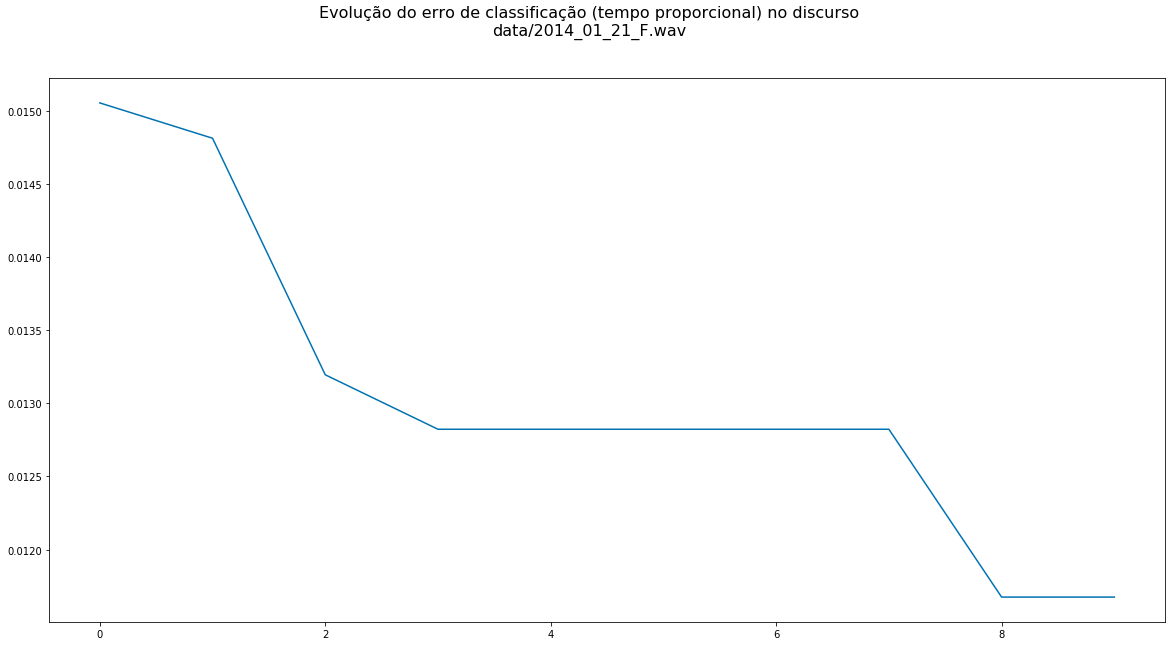

In [27]:
show_report(1)



Erros para o áudio data/2014_01_22_F.wav


,trainning (N),trainning (Time),remaining (N),remaining (Time),all (N),all (Time)
0,0.0,0.0,0.028798,0.032465,0.028210,0.031792
1,0.0,0.0,0.018848,0.019190,0.017510,0.017726
2,0.0,0.0,0.014349,0.015065,0.012646,0.013054
3,0.0,0.0,0.013953,0.015393,0.011673,0.012508
4,0.0,0.0,0.014706,0.016342,0.011673,0.012508
5,0.0,0.0,0.015504,0.017675,0.011673,0.012508
6,0.0,0.0,0.014986,0.017163,0.010700,0.011369
7,0.0,0.0,0.014368,0.017770,0.009728,0.010939
8,0.0,0.0,0.016667,0.021023,0.010700,0.012077
9,0.0,0.0,0.014377,0.018266,0.008755,0.009745


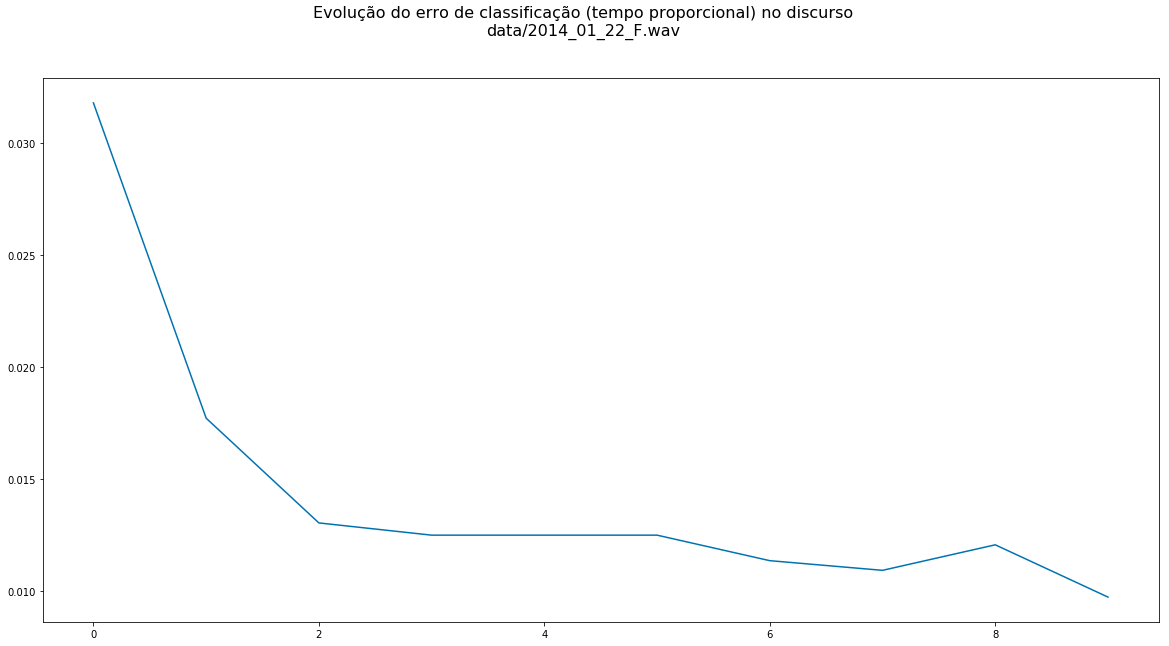

In [28]:
show_report(2)

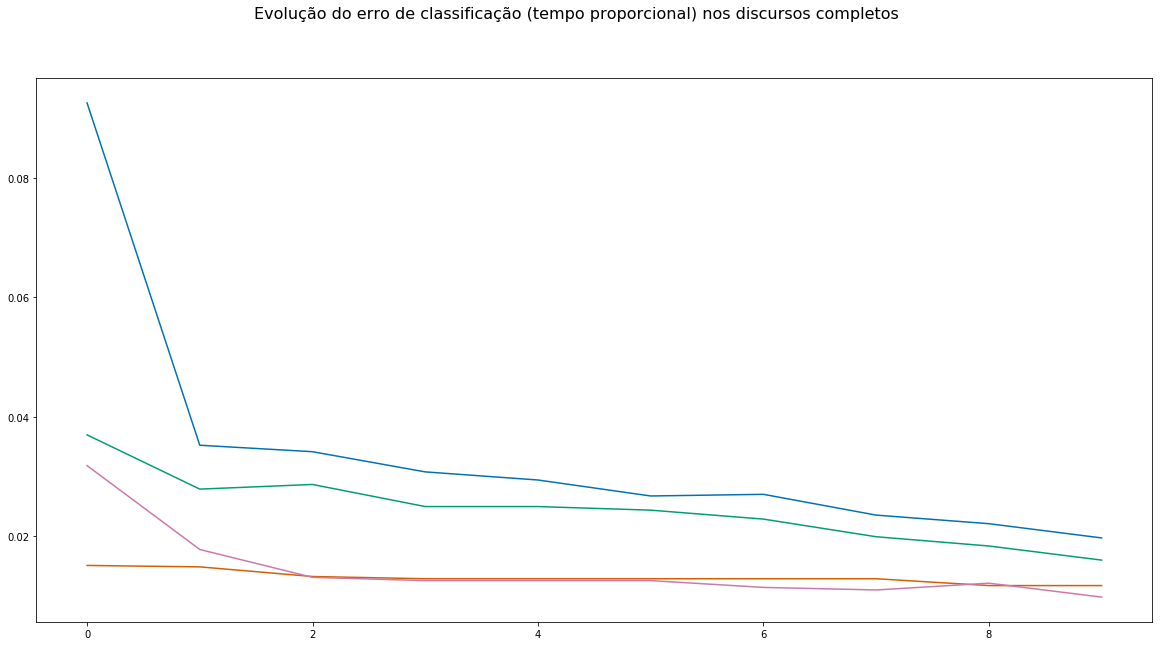

In [39]:
print
evolution_list.insert(0, evolution_first)
fig = plt.figure()
fig.suptitle(u'Evolução do erro de classificação (tempo proporcional) nos discursos completos'.format(
    audio.filename), fontsize=16)
for evolution in evolution_list:
    plt.plot([error_in_chunks(chunks)[-1] for _, __, chunks in evolution]);